In [62]:
#### SET UP IN SETTING AND POTENTIAL THE DT LIST AND PARA OF THE POTENTIAL 
#### SET UP THE PATH TO THE DATA OF INTEREST 
## hard problem generated on lap top 
import os
os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Weak SDE approximation/C++/eddie")



import matplotlib.pyplot as plt
import re
import sys
import numpy as np
from scipy.stats import norm
import scipy.integrate as integrate

import pandas as pd
font_size=25
lw=4

myblue = (0,119/235,187/235)
myred=(187/235,85/235,102/235)
myyellow=(221/235,170/235,51/235)
mygrey=(187/235,187/235,187/235)
mygreen="#66BB55"
mymagenta="#7733DD"

import matplotlib.ticker as mtick
plt.rc('xtick', labelsize=font_size) 
plt.rc('ytick', labelsize=font_size) 


In [63]:
from settings_and_potential_eddie import *
dt_list

array([0.0005, 0.001 , 0.005 , 0.01  , 0.05  , 0.1   , 0.5   ])

In [64]:

### EDDIE RESULTS 

# dta_noada = pd.DataFrame()
# dta_tr = pd.DataFrame()
# dta_re = pd.DataFrame()

# for i in range(len(dt_list)):
#     dti=dt_list[i]
#     file_i = "results_eddie/data_easy500000/vec_noadai="+str(i)+".txt"
#     x_noada=np.hstack(openCfile(file_i))
#     file_i = "results_eddie/data_easy500000/vec_tri="+str(i)+".txt"
#     x_tr=np.hstack(openCfile(file_i))
#     file_i = "results_eddie/data_easy500000/vec_rei="+str(i)+".txt"
#     x_re=np.hstack(openCfile(file_i))

#     dta_noada["x"+str(i)] = x_noada
#     dta_tr["x"+str(i)] = x_tr
#     dta_re["x"+str(i)] = x_re

### OWN RESULTS 

dta_noada = pd.DataFrame()
dta_tr = pd.DataFrame()
dta_re = pd.DataFrame()

for i in range(len(dt_list)):
    dti=dt_list[i]
    file_i = "accuracy/data_hard/vec_noadai="+str(i)+".txt"
    x_noada=np.hstack(openCfile(file_i))
    file_i = "accuracy/data_hard/vec_tri="+str(i)+".txt"
    x_tr=np.hstack(openCfile(file_i))
    file_i = "accuracy/data_hard/vec_rei="+str(i)+".txt"
    x_re=np.hstack(openCfile(file_i))

    dta_noada["x"+str(i)] = x_noada
    dta_tr["x"+str(i)] = x_tr
    dta_re["x"+str(i)] = x_re

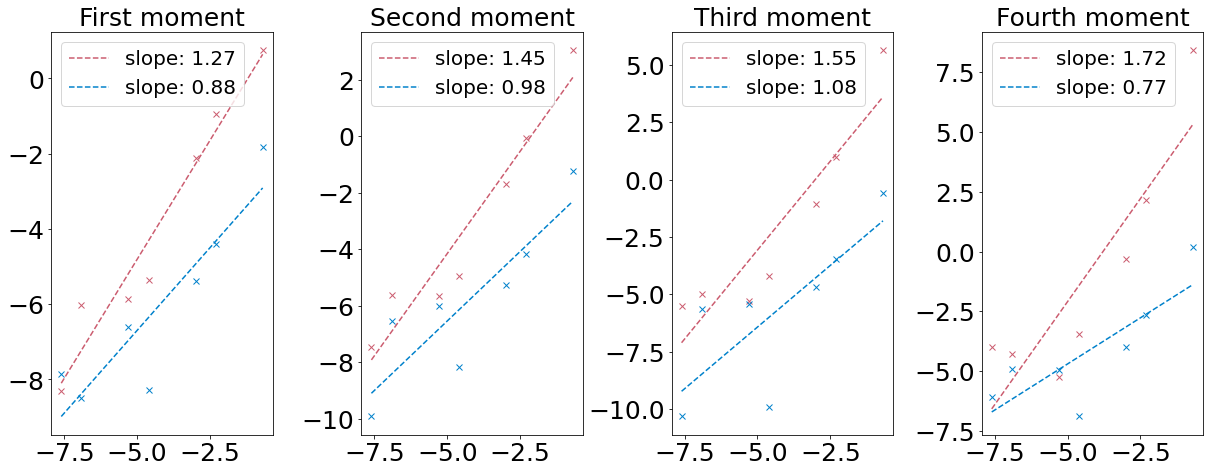

In [65]:
# ###########################################
# ## Interpolate the slope
# ###########################################
x = np.log(dt_list)
A = np.vstack([x, np.ones(len(x))]).T

# ###########################################
# ## Compute the log moments
# ###########################################
fig, (ax1,ax2,ax3,ax4)= plt.subplots(1,4,figsize=(20,7))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

ax1.set_title("First moment",fontsize=font_size)
ax2.set_title("Second moment",fontsize=font_size)
ax3.set_title("Third moment",fontsize=font_size)
ax4.set_title("Fourth moment",fontsize=font_size)

## no adaptive 
###############
lab="Overdamped"
mom1_list,mom2_list,mom3_list,mom4_list,mom_1_plussd,mom_2_plussd,mom_3_plussd,mom_4_plussd=moment_list(dt_list,tau,dta_noada,range_int)
ax1.plot(x,np.log(mom1_list),"x",color=myred)
ax2.plot(x,np.log(mom2_list),"x",color=myred)
ax3.plot(x,np.log(mom3_list),"x",color=myred)
ax4.plot(x,np.log(mom4_list),"x",color=myred)

## interpolation linear  
#first moment
m, c = np.linalg.lstsq(A, np.log(mom1_list), rcond=None)[0]
ax1.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myred)
#second moment
m, c = np.linalg.lstsq(A, np.log(mom2_list), rcond=None)[0]
ax2.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myred)
#third moment
m, c = np.linalg.lstsq(A, np.log(mom3_list), rcond=None)[0]
ax3.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myred)
#fourth moment
m, c = np.linalg.lstsq(A, np.log(mom4_list), rcond=None)[0]
ax4.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myred)


## Transformed 
###############
# lab="Transformed overdamped"
mom1_list,mom2_list,mom3_list,mom4_list,mom_1_plussd,mom_2_plussd,mom_3_plussd,mom_4_plussd=moment_list(dt_list,tau,dta_tr,range_int)
ax1.plot(x,np.log(mom1_list),"x",color=myblue)
ax2.plot(x,np.log(mom2_list),"x",color=myblue)
ax3.plot(x,np.log(mom3_list),"x",color=myblue)
ax4.plot(x,np.log(mom4_list),"x",color=myblue)


## interpolation linear  
#first moment
m, c = np.linalg.lstsq(A, np.log(mom1_list), rcond=None)[0]
ax1.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myblue)
#second moment
m, c = np.linalg.lstsq(A, np.log(mom2_list), rcond=None)[0]
ax2.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myblue)
#third moment
m, c = np.linalg.lstsq(A, np.log(mom3_list), rcond=None)[0]
ax3.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myblue)
#fourth moment
m, c = np.linalg.lstsq(A, np.log(mom4_list), rcond=None)[0]
ax4.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myblue)


ax1.legend(fontsize=font_size*0.8,ncol=1,loc="upper left")#,bbox_to_anchor=(1.5, 1.3))
ax2.legend(fontsize=font_size*0.8,ncol=1,loc="upper left")#,bbox_to_anchor=(1.5, 1.3))
ax3.legend(fontsize=font_size*0.8,ncol=1,loc="upper left")#,bbox_to_anchor=(1.5, 1.3))
ax4.legend(fontsize=font_size*0.8,ncol=1,loc="upper left")#,bbox_to_anchor=(1.5, 1.3))


fig.savefig('figures/moments_logplot_'+str(pot)+'.png')

